In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#Importer les données:

In [54]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
#Le nettoyage des données:

In [10]:
#Est-ce qu'il existe des valeurs manquantes:
print(df.isnull().values.any())

False


In [11]:
#Le nombre de ces valeurs manquantes:
print(df.isnull().sum().sum())

0


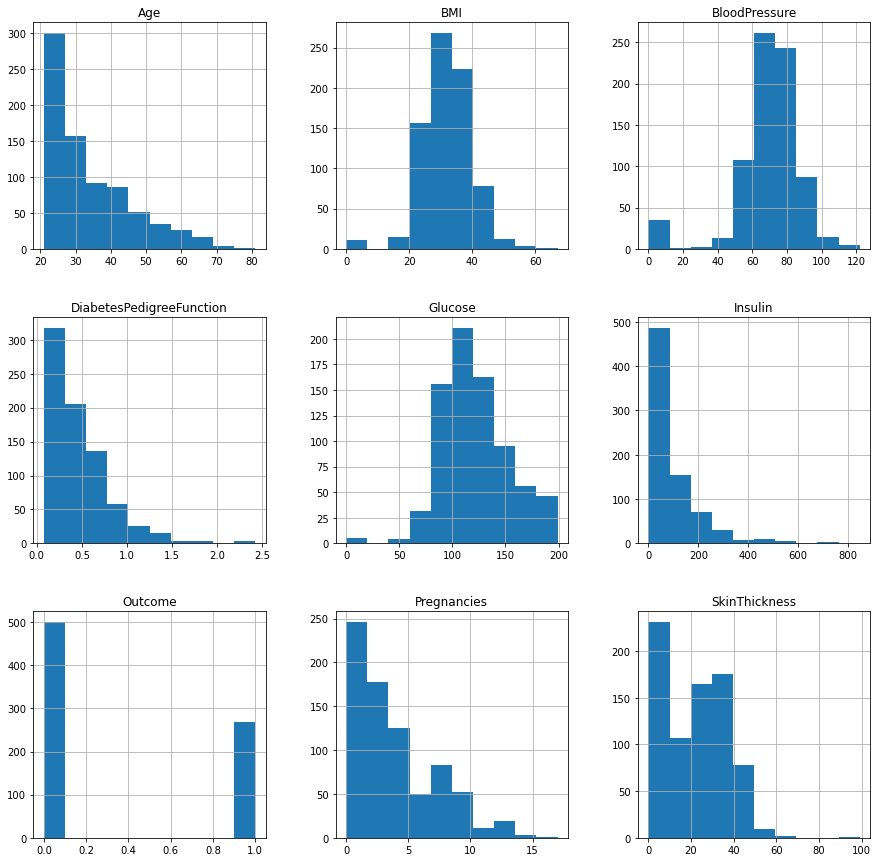

In [12]:
p = df.hist(figsize = (15,15))

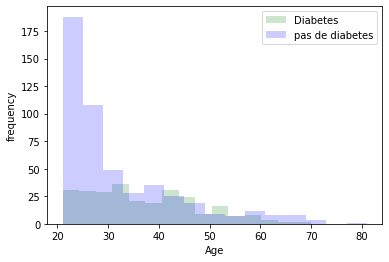

In [13]:
#séparer les valeurs de Outcome
plt.figure()
plt.hist(df[df.Outcome==1]['Age'],bins=15,label='Diabetes',color='g',alpha=0.2)
plt.hist(df[df.Outcome==0]['Age'],bins=15,label='pas de diabetes',color='b',alpha=0.2)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.legend()
plt.show()

Text(0, 0.5, 'BloodPressure')

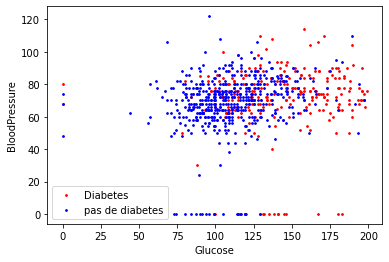

In [21]:
# plot Glucose vs BloodPressure and color points according to Outcome
plt.figure()
plt.scatter(df[df.Outcome==1].Glucose,df[df.Outcome==1].BloodPressure,label='Diabetes',color='r',s=3)
plt.scatter(df[df.Outcome==0].Glucose,df[df.Outcome==0].BloodPressure,label='pas de diabetes',color='b',s=3)
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

Text(0.5, 1.0, 'CORRELATION MATRIX')

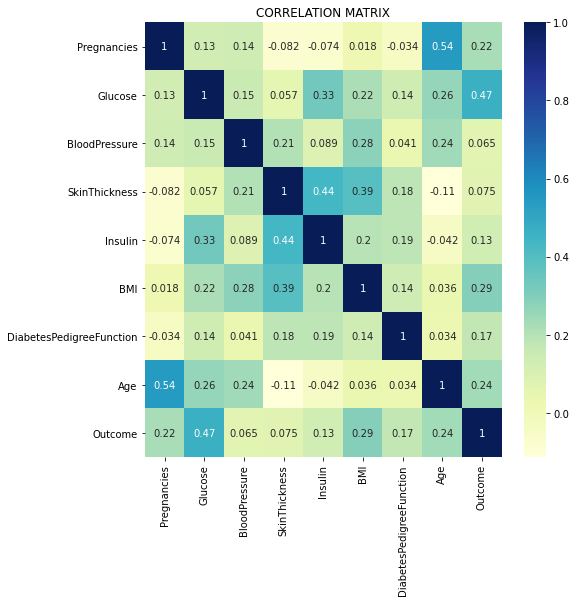

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")
plt.title("CORRELATION MATRIX")

In [23]:
#1-On transforme en matrice numpy
data=df.values
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [67]:
#Découper la data en un jeu d'entraînement (X_train, y_train) et un jeu de test (X_test, y_test).
#x et y
x = df.drop("Outcome",axis = 1)
y=df.Outcome

In [68]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.8)

# RandomForestClassifier

# LOGISTIC REGRESSION

In [69]:
#En utilisant la classe LogisticRegression:
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression(solver="liblinear")
model1.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [70]:
#prediction sur l'échantillon test:
y_p=model1.predict(xtest)

             1)-Matrice de confusion

In [71]:
from sklearn import metrics
mc1 = metrics.confusion_matrix(ytest,y_p)
print(mc1)

[[85  8]
 [29 32]]


# UTILISATION DE SVM

In [89]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(xtrain, ytrain)

SVC()

In [90]:
#Predict
svc_pred = svc_model.predict(xtest)

            1)-Matrice de confusion

In [91]:
#Metrics for SVM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(ytest, svc_pred))


[[84  9]
 [32 29]]


In [92]:
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(ytest, svc_pred)

Text(0.5, 15.0, 'Predicted VALUES')

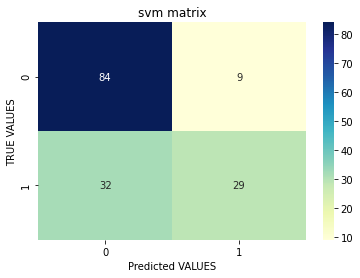

In [93]:
p = sns.heatmap(pd.DataFrame(svm_matrix), annot=True, cmap="YlGnBu")
plt.title('svm matrix')
plt.ylabel('TRUE VALUES')
plt.xlabel('Predicted VALUES')


# UTILISATION DE KNN

<function matplotlib.pyplot.show(*args, **kw)>

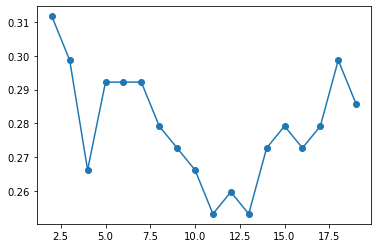

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

erreurr=[] #il faut la stocker dans un tableau si non on aura qu'une seule erreur a chaque fois elle va etre ecrasé

for i in range (2,20):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i) 
    erreurr.append(1-knn.fit(xtrain, ytrain).score(xtest,ytest)) #a chaque fois il faut trainer le modele et caluler l'erreur
plt.plot(range(2,20),erreurr,'o-')
plt.show

In [85]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(2,20),xtrain,ytrain,marker='*',label='Train Score')
p = sns.lineplot(range(2,20),xtest,ytest,marker='o',label='Test Score')


ValueError: array length 18 does not match index length 614

<Figure size 864x360 with 0 Axes>

In [79]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(15)

knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

0.7207792207792207

           1)- Matrice de confusion

In [38]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(xtest)
y_pred


array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

Text(0.5, 15.0, 'Predicted VAlues')

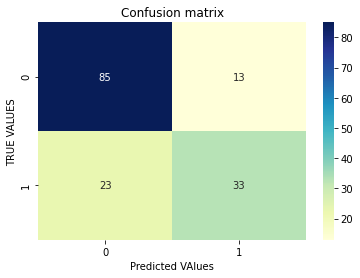

In [39]:
y_pred = knn.predict(xtest)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('TRUE VALUES')
plt.xlabel('Predicted VAlues')

               3)-Courbe de roc

In [40]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, y_pred)


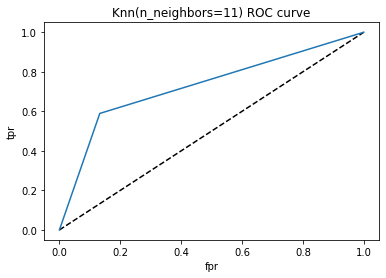

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

print("Best Score:" + str(knn_cv.best_score_))


Best Score:0.7578558696205755


# DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeClassifier

# create Gaussian Naive Bayes model object and train it with the data
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(xtrain, ytrain.ravel())

DecisionTreeClassifier(random_state=42)

In [44]:
# this returns array of predicted results
prediction_from_trained_data = dt_model.predict(xtrain)

In [45]:
from sklearn import metrics

accuracy = metrics.accuracy_score(ytrain, prediction_from_trained_data)

print ("Accuracy of our DT model is : {0:.4f}".format(accuracy))

Accuracy of our DT model is : 1.0000


In [46]:
dt_predict_test = dt_model.predict(xtest)

#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(ytest, dt_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(dt_accuracy_testdata))

Accuracy: 0.7338


In [47]:
print ("Confusion Matrix for DT")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(ytest, dt_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(ytest, dt_predict_test, labels=[ 1,0])))

Confusion Matrix for DT
[[34 22]
 [19 79]]

Classification Report

              precision    recall  f1-score   support

           1       0.64      0.61      0.62        56
           0       0.78      0.81      0.79        98

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



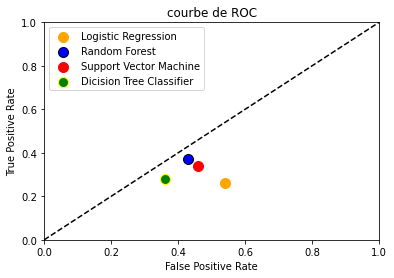

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# fpr, tpr
naive_bayes = np.array([0.28, 0.52])
logistic = np.array([0.54, 0.26])
random_forest = np.array([0.43, 0.37])
ann = np.array([0.36, 0.44])
svm = np.array([0.46, 0.34])
dt = np.array([0.52, 0.28])

#plotting
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=100)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=100)
plt.scatter(svm[0], svm[1], label = 'Support Vector Machine', facecolors='red', edgecolors='red', s=100)
plt.scatter(ann[0], dt[1], label = 'Dicision Tree Classifier', facecolors='green', edgecolors='yellow', s=100)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('courbe de ROC')
plt.legend(loc='upper left')
plt.show()

In [94]:
#Logistic Regression ROC Curve:

from sklearn.metrics import roc_curve

from sklearn.metrics import auc

test_scores = model1.predict_proba(xtest)

fpr, tpr, threshold = roc_curve(ytest, test_scores[:,1])

roc_auc = auc(fpr, tpr)

 

#test_scores_knn = knn.predict_proba(xtest)

#fpr_knn, tpr_knn, threshold_knn= roc_curve(ytest, test_scores_knn[:, 1])

#roc_auc_knn =  metrics.auc(fpr_knn, tpr_knn)

clf=svm.SVC(probability=True)

test_scores_svm = svc_model.predict_proba(xtest)

fpr_svm, tpr_svm, threshold_svm = roc_curve(ytest, test_scores_svm[:, 1])

roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

 

test_scores_DTC = DTC.predict_proba(xtest)

fpr_DTC, tpr_DTC, threshold_DTC = roc_curve(ytest, test_scores_DTC[:, 1])

roc_auc_DTC = metrics.auc(fpr_DTC, tpr_DTC)

 

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'r', label = 'RL = %0.2f' % roc_auc)

plt.plot(fpr_knn, tpr_knn, 'g', label = 'KNN = %0.2f' % roc_auc_knn)

plt.plot(fpr_svm, tpr_svm, 'b', label = 'SVM = %0.2f' % roc_auc_svm)

plt.plot(fpr_DTC, tpr_DTC, 'black', label = 'DTC = %0.2f' % roc_auc_DTC)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.title('ROC Curve of  Logistic Regression')

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'SVC'

# 2eme partie 

In [50]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(55, input_dim=8,activation='relu'))
model.add(Dense(15, input_dim=8,activation='relu'))
model.add(Dense(1, input_dim=8,activation='sigmoid'))

In [51]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=150,batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 3.0723 - accuracy: 0.5114
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 1.3657 - accuracy: 0.6107
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.9974 - accuracy: 0.6319
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8229 - accuracy: 0.6726
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.7134
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7692 - accuracy: 0.6775
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7603 - accuracy: 0.6596
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.7020
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8736 - accuracy: 0.6824
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.6987
Epoch 11/

62/62 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.7166
Epoch 83/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7638
Epoch 84/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7801
Epoch 85/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7573
Epoch 86/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7573
Epoch 87/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7704
Epoch 88/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7606
Epoch 89/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7704
Epoch 90/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.7622
Epoch 91/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8013
Epoch 92/150


In [255]:
scores = model.evaluate(xtest,ytest)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.7143

accuracy: 71.43%
